# Proyek PBA oleh Kelompok Impostor

Sentiment Analysis for Amazon Food Review Using SVM

In [1]:
import pandas as pd
import numpy as np
import string
import csv
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_csv("./Reviews.csv",error_bad_lines=False)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [4]:
df.shape

(568454, 10)

In [5]:
df.info

<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [6]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df.Text.head()

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1             Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2    This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...
3    If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The fl...
4                                                               Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taff

# Explore Data

Pada tahap eksplorasi data akan dilakukan visualisasi review customer menggunakan Word Cloud. Word cloud (atau disebut juga tag cloud) adalah representasi visual dari data teks, biasanya digunakan untuk menggambarkan metadata atau untuk memvisualisasikan suatu bentuk teks secara bebas. Wordcloud (atau Tag cloud) adalah representasi visual dari data teks ini.  Ini menampilkan daftar kata dengan berbagai ukuran font atau warna yang berguna untuk memahami istilah yang paling menonjol dengan cepat 

In [28]:
! pip install wordcloud

In [29]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [41]:
# Merancang data frame "review" untuk ,menampilkan hasil eksplorasi data untuk dianalisis
review = df
# Menghilangkan nilai null
review.dropna(inplace=True)

In [44]:
#Membangun nilai (score) pada setiap review
score_1 = review[review['Score'] == 1]
score_2 = review[review['Score'] == 2]
score_3 = review[review['Score'] == 3]
score_4 = review[review['Score'] == 4]
score_5 = review[review['Score'] == 5]

In [45]:
sampel = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
sampel.reset_index(drop=True,inplace=True)

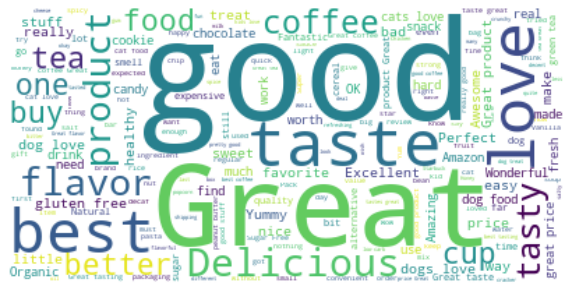

In [50]:
#WordCloud membutuhkan inputan single string dari teks
#Ringkasan review akan digabungkan menjadi single string
# similarly akan dibangun melalui atribut Text
review_str = sampel.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
# Split review yang bersifat buruk dengan score 1 dan 2 serta review baik dengan score 4 dan 5.
bad_reviews = sampel[sampel['Score'].isin([1,2]) ]
good_reviews = sampel[sampel['Score'].isin([4,5]) ]
# Transform menjadi single string
bad_reviews_str = bad_reviews.Summary.str.cat()
good_reviews_str = good_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Review dengan Score Buruk')

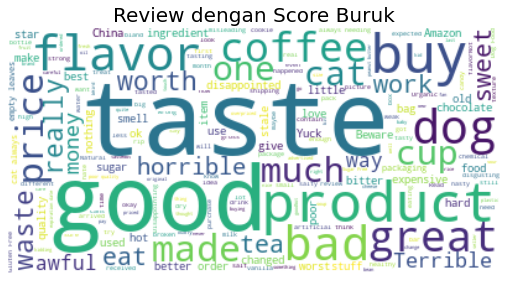

In [53]:
wordcloud_bad = WordCloud(background_color='white').generate(bad_reviews_str)
wordcloud_good = WordCloud(background_color='black').generate(good_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Review dengan Score Buruk',fontsize=20)

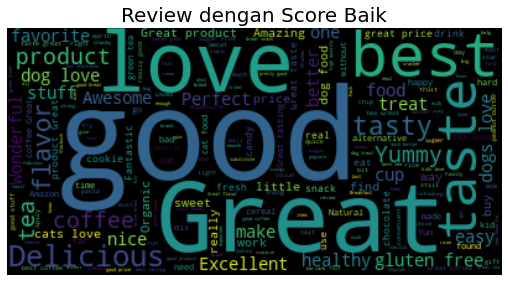

In [54]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Review dengan Score Baik',fontsize=20)
plt.show()

# Text Processing

Text Preprocessing akan menggunakan TextBlob Library. Dalam Text Preprocessing akan melakukan remove stop words, punctuations, convert into lower cases, lemmatize,

In [18]:
! pip install textblob

In [55]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [56]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [58]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(7)

0    bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better                                                                                                                     
1    product arrived labeled jumbo salted peanutsthe peanut actually small sized unsalted sure error vendor intended represent product jumbo                                                                                                                                               
2    confection around century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sister witch
3    looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal               

In [24]:
#remove the stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better                                                                                                                         
1    product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo                                                                                                                                                     
2    confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
3    looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor med

In [27]:
#Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better                                                                                                                     
1    product arrived labeled jumbo salted peanutsthe peanut actually small sized unsalted sure error vendor intended represent product jumbo                                                                                                                                               
2    confection around century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sister witch
3    looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal               